# Data Generation and Validation

## NOTICE
Regretably real LFP and Spiking data has rules behind it, and we have not been able to that we can use all of it yet.
We do however have a general idea of what the data looks like.
Below are the methods used to generate some data to confirm that our `spike_inference` program works on data of the same shape.

- *Leonardo Ferrisi*

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Generate Simulated LFP Data and Spikes
# Parameters for the fake LFP signal
duration      = 10          # Duration in seconds
sampling_rate = 1000   # Sampling rate in Hz (samples per second)
num_samples   = duration * sampling_rate
time          = np.linspace(0, duration, num_samples, endpoint=False)

# Frequencies to include in the LFP signal
freqs         = [10, 15, 30, 55]

# Generate the LFP signal as the sum of multiple sine waves
lfp = np.zeros_like(time)
for freq in freqs:
    lfp += np.sin(2 * np.pi * freq * time)

# Optionally, you could average the sine waves:
# lfp = lfp / len(freqs)

# Add Gaussian noise to simulate real-world conditions
noise_std = 0.5  # Standard deviation of the noise
lfp += np.random.normal(0, noise_std, size=num_samples)

# Simulate spike events: mark spike=1 when the LFP exceeds a threshold.
# Adjust the threshold based on the expected amplitude of the LFP.
spike_threshold = 2.0
spike = (lfp > spike_threshold).astype(int)

# Create a DataFrame with the time, LFP signal, and spike events
df = pd.DataFrame({
    'time': time,
    'lfp': lfp,
    'spike': spike
})

# Write the DataFrame to a CSV file
output_filename = 'data_gen_test.csv'
df.to_csv(output_filename, index=False)
print(f"Fake LFP data saved to {output_filename}")

Fake LFP data saved to data_gen_test.csv


Columns: ['time', 'lfp', 'spike']


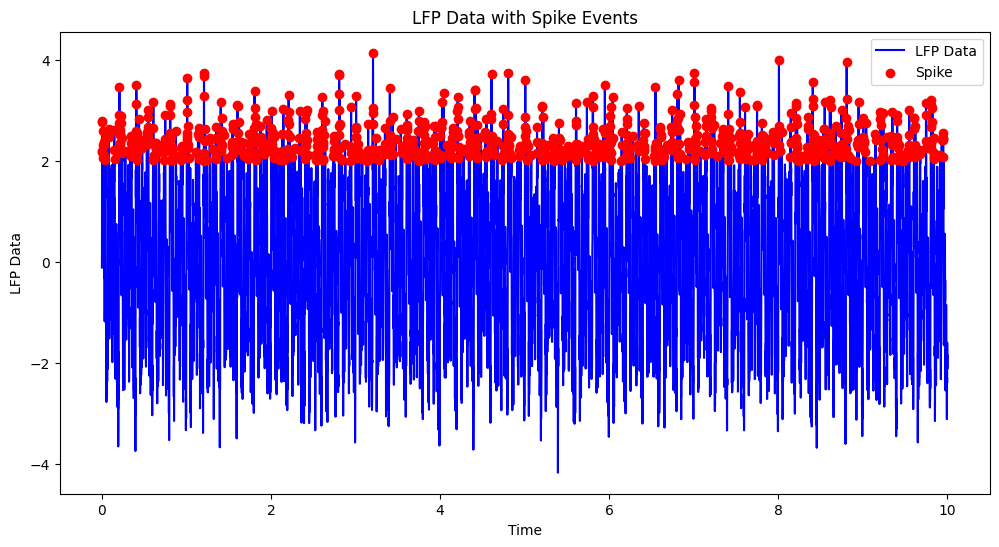

In [8]:
# Plotting the Data
# Each spike is marked as a red dot on the plot
# The LFP data is very noisy, but you can see the spikes clearly

# Load the CSV data
df = pd.read_csv("data_gen_test.csv")

# Clean the column names (if necessary)
df.columns = df.columns.str.strip().str.lower()

# Verify columns
print("Columns:", df.columns.tolist())

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the lfp_data over time
plt.plot(df['time'], df['lfp'], label='LFP Data', color='blue')

# Overlay spike events (assuming spike is stored as a boolean or 0/1)
spike_mask = df['spike'] == True  # or df['spike'] == 1 if spikes are marked as 1
plt.scatter(df.loc[spike_mask, 'time'], df.loc[spike_mask, 'lfp'],
            color='red', label='Spike', zorder=5)

# Label the axes and add a title
plt.xlabel("Time")
plt.ylabel("LFP Data")
plt.title("LFP Data with Spike Events")
plt.legend()

# Show the plot
plt.show()

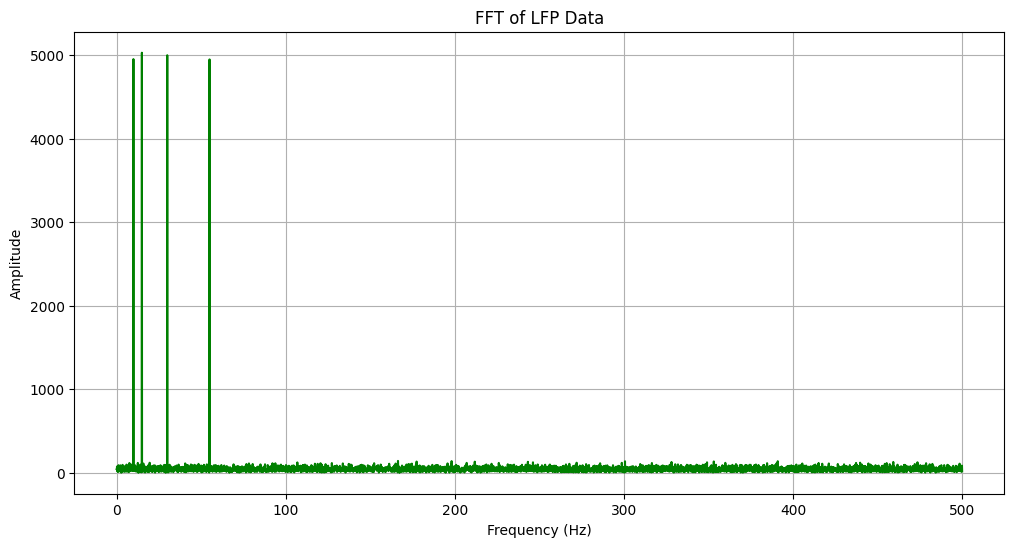

In [10]:
# FFT for further validation

# Load the CSV data
df = pd.read_csv("data_gen_test.csv")
# Clean column names if needed
df.columns = df.columns.str.strip().str.lower()  # makes them lowercase and strips whitespace

# Extract time and LFP data
time = df['time']
lfp = df['lfp']

# Calculate the sampling interval (assuming time is uniformly spaced)
dt = np.mean(np.diff(time))
fs = 1 / dt  # sampling frequency

# Compute FFT
n = len(lfp)
fft_result = np.fft.fft(lfp)
freq = np.fft.fftfreq(n, d=dt)

# For plotting, take only the positive frequencies
mask = freq > 0
freq_pos = freq[mask]
fft_amplitude = np.abs(fft_result[mask])

# Plot the FFT amplitude spectrum
plt.figure(figsize=(12, 6))
plt.plot(freq_pos, fft_amplitude, color='green')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("FFT of LFP Data")
plt.grid(True)
plt.show()